In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()   # OvR
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/home/lin/software/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9711111111111111

In [19]:
y_predict = log_reg.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 50,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 37,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 38,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  0,  0,  0,  1,  2,  0,  1, 44,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 42]])

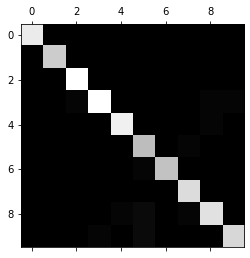

In [21]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [22]:
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)  # 对角线填0，因为不关注分正确的样本
err_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.02      , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.02222222],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.02083333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.02325581, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02631579, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

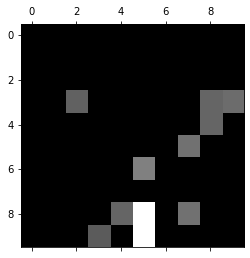

In [24]:
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()
# 越亮的地方，犯错越多的地方
# 可以微调8，9的threshold，或者看数据集中的8，9的图片，排除数据的问题